# Atividade Computacional 2

PPGEE0018: Processamento Digital de Sinais.

Aluno: Ricardo Augusto de Araújo Machado

In [16]:
from scipy.io.wavfile import read
from pathlib import Path
import scipy.signal as sps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
audio_path = Path('dados/Aftermath DI.wav')
fs, dados_wav = read(audio_path)
dados_wav = dados_wav[:, 0]  # Pega apenas um canal do áudio

/tmp/ipykernel_17827/513999696.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados_wav = read(audio_path)


In [18]:
# Definir uma janela de Hann da ordem de 30 ms.
NUM_PONTOS = int(0.03 * fs)
window = sps.windows.hamming(NUM_PONTOS)

In [19]:
def plotar_espectrograma(dado_wav, window: np.ndarray, hop_size: int, fs: float) -> None:
    # Calcular a STFT
    frequencias, tempos, matriz_stft = sps.stft(dado_wav, fs=fs, window=window, nperseg=len(window), noverlap=len(window)-hop_size)
    espectrograma_audio = np.abs(matriz_stft) ** 2

    # Limitar a frequência máxima para 5 kHz
    freq_max = 5000  # Hz
    idx_max = np.where(frequencias <= freq_max)[0][-1] + 1
    frequencias = frequencias[:idx_max]
    espectrograma_audio = espectrograma_audio[:idx_max, :]

    # Plotar o espectrograma
    sns.heatmap(10 * np.log10(espectrograma_audio + 1e-10), cmap='magma')
    plt.xticks(ticks=np.linspace(0, len(tempos)-1, 10), labels=np.round(np.linspace(0, tempos[-1], 10), 2))
    plt.yticks(ticks=np.linspace(0, len(frequencias)-1, 10), labels=np.round(np.linspace(0, frequencias[-1], 10)/1000, 2))
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (kHz)')
    plt.title('Espectrograma do áudio (até 5 kHz)')
    plt.show()


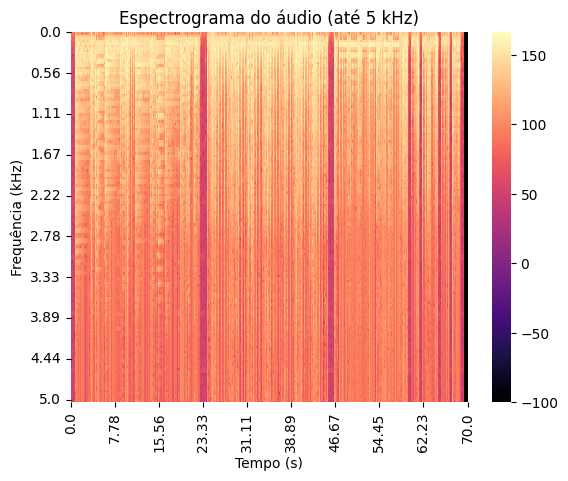

In [20]:
plotar_espectrograma(dados_wav, window, hop_size=NUM_PONTOS//4, fs=fs)